# TDI Capstone Proposal
######                        by Saani Rawat
######                        02/23/2020

Job markets, in today's world, are extremely competitive. When we talk about data science market, the level of competition is fierce. Employees want to identify the open positions that best suit their long-term goals and needs. On the other hand, employers wish to attract best talent out of the available pool of candidates and stay ahead of their competition.

The purpose of the project is to analyse the current market condition of data-related jobs in major metropolitan cities: New York City, San Francisco, Los Angeles, Charlotte, Boston and Washington. I used web scraping tools in Python to extrapolate job postings data. Data were obtained using web scraping techniques (using Python) on Indeed's website.
In this notebook, we use the data scraped using "Job Postings data scraping.py" to identify interest patterns and relationships in the extracted dataset.


##  1. Data Source 

Data for major U.S metropolitan cities was scraped from Indeed's website. source: https://www.indeed.com

To understand how the data was scraped, see <font color=red> Job Postings data scraping.py </font>, which can be found  [here](https://github.com/saannidhya/TDI-Capstone/blob/master/code/Job%20Postings%20data%20scraping.py)

##  2. Data Description 

Dataset name: data_science_jobs_df.csv

**Columns** -

*Unnamed column - contains index*

*0 - Job Title*

*1 - Company's Name*

*2 - Company's Location*

*3 - Salary*

*4 - Job Summary*

In [1]:
# Importing libraries
import numpy as np
import pandas as pd 
import plotly.offline as pyo
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/data_science_jobs_df.csv


## 3. Data Cleaning 

Scraped data is often times quite messy. Hence, appropriate cleaning needs to be performed on datasets to make them comprehensible and suitable for analysis.
In this section, we identify and eliminate missing values, duplicates and other non-sensical observations.

In [2]:
# Reading in the dataset
data_science_jobs_df = pd.read_csv("../input/data_science_jobs_df.csv")
df = pd.DataFrame(data_science_jobs_df)

In [3]:
# Checking the first 5 rows
data_science_jobs_df.head()
# The column names are not very intuitive. Let's change them.
cols = {'Unnamed: 0' : 'ID', '0': 'Title', '1' : 'Company', '2' : 'Company_Address', '3' : 'Salary', '4': 'Summary'}
df = df.rename(columns = cols)
df.head()

,ID,Title,Company,Company_Address,Salary,Summary
0,0,Senior Data Scientist,Qloo,"New York, NY 10002 (Lower East Side area)","$120,000 - $155,000 a year",Experience with common analysis tools like SQL...
1,1,Data Scientist Intern,81qd,"New York, NY 10017 (Turtle Bay area)","$120,000 - $180,000 a year",The Data Scientist is responsible for the data...
2,2,Lead Data Scientist - IT/Financial,Trova Advisory Group,"Brooklyn, NY","$350,000 - $500,000 a year",The candidate should be a self-starter and a g...
3,3,Data Scientist (NLP Focused),Fakespot,"New York, NY 10005 (Financial District area)","$80,000 - $150,000 a year",You have a passion for solving complex analyti...
4,4,Data Scientist/Data Science Instructor,NYC Data Science Academy,"New York, NY","$125,000 - $190,000 a year","Train in-person or online boot camp students, ..."


In [4]:
# Checking the n.o of obs in the dataset
len(df)
# df.loc[0:100,:]

30712

A lot of the observations for the Salary column in the dataset have missing values. For our purposes, salary is the one of the most important columns. Hence, *removing job postings which do not reveal the offered salary*.

In [5]:
# Removing observations with no salary information
df_sal = df.loc[~df.loc[:, 'Salary'].isnull(),:]
# Checking length of the new dataset
len(df_sal)
# nobs removed
len(df) - len(df_sal)

26012

26012 observations did not contain salary information and hence, were removed from the dataset.

Data scraped from web pages often contains duplicates because the web pages often redirect to the same page during iteration. Hence, checking if any duplicate observations exist in our dataset with populated salary information.

In [6]:
# Checking the n.o of duplicates in the dataset based on Title, Company, Company_Address and Salary
df_sal[df_sal.duplicated(['Title', 'Company', 'Company_Address', 'Salary'])]
# len(df_sal[df_sal.duplicated(['Title', 'Company', 'Company_Address', 'Salary'])])
# 3736
# An e.g of duplicate observation -
df_sal.loc[(df_sal['Company'] == 'Qloo') & (df_sal['Title'] == 'Senior Data Scientist') , :]

,ID,Title,Company,Company_Address,Salary,Summary
0,0,Senior Data Scientist,Qloo,"New York, NY 10002 (Lower East Side area)","$120,000 - $155,000 a year",Experience with common analysis tools like SQL...
20,20,Senior Data Scientist,Qloo,"New York, NY 10002 (Lower East Side area)","$120,000 - $155,000 a year",Qloo offers a competitive compensation and ben...
38,38,Senior Data Scientist,Qloo,"New York, NY 10002 (Lower East Side area)","$125,000 - $190,000 a year",Experience with common analysis tools like SQL...
293,293,Senior Data Scientist,Qloo,"New York, NY 10002 (Lower East Side area)","$120,000 - $155,000 a year",Experience with common analysis tools like SQL...
361,361,Senior Data Scientist,Qloo,"New York, NY 10002 (Lower East Side area)","$120,000 - $155,000 a year",Experience with common analysis tools like SQL...
393,393,Senior Data Scientist,Qloo,"New York, NY 10002 (Lower East Side area)","$120,000 - $155,000 a year",Experience with common analysis tools like SQL...
409,409,Senior Data Scientist,Qloo,"New York, NY 10002 (Lower East Side area)","$120,000 - $155,000 a year",Experience with common analysis tools like SQL...
555,555,Senior Data Scientist,Qloo,"New York, NY 10002 (Lower East Side area)","$120,000 - $155,000 a year",Experience with common analysis tools like SQL...
571,571,Senior Data Scientist,Qloo,"New York, NY 10002 (Lower East Side area)","$120,000 - $155,000 a year",Experience with common analysis tools like SQL...
587,587,Senior Data Scientist,Qloo,"New York, NY 10002 (Lower East Side area)","$120,000 - $155,000 a year",Experience with common analysis tools like SQL...


Our data contains** a lot **of duplicates. We need to get rid of these as they can skew our analysis.

In [7]:
# Removing duplicates
df_sal_no_dup = df_sal.drop_duplicates(subset = ['Title', 'Company', 'Company_Address', 'Salary'])
len(df_sal_no_dup)

964

Now, we are left with 964 valid (dare I say clean) observations for our analysis.

Next, we need to clean the columns so that appropriate analysis can be performed.
1. We need to extract city out of company address 
2. Salary range is given instead of salary, and that too in different formats (monthly, yearly, daily etc.). We need to align them.


In [8]:
# Extracting city out of company address
pd.options.mode.chained_assignment = None  # default='warn'
df_sal_no_dup.loc[:, 'City'] = df_sal_no_dup['Company_Address'].apply(lambda x: str(x).split(',')[0])

In [9]:
# Extracting year, month or day out of salary
df_sal_no_dup.loc[:, 'Sal_type'] = df_sal_no_dup['Salary'].apply(lambda x: str(x).split(' ')[-1])

# Extracting max of the salary range
df_sal_no_dup.loc[:, 'Sal_max'] = df_sal_no_dup['Salary'].apply(lambda x: str(x).split(' ')[-3])
# Removing dollar sign and converting column into string
df_sal_no_dup.loc[:, 'Sal_max'] = df_sal_no_dup['Salary'].apply(lambda x: str(x).split('$')[1])
df_sal_no_dup.loc[:, 'Sal_max'] = df_sal_no_dup['Sal_max'].apply(lambda x: str(x).split(' ')[0])

# Converting all monthly, hourly, and weekly salaries into yearly
## Yearly
mon_bool = df_sal_no_dup['Sal_type'] == 'year'
df_sal_no_dup.loc[(mon_bool), 'Annual_Max_Salary'] = df_sal_no_dup['Sal_max'].apply(lambda x: float(str(x).replace(',','')))
## Monthly
mon_bool = df_sal_no_dup['Sal_type'] == 'month'
df_sal_no_dup.loc[(mon_bool), 'Annual_Max_Salary'] = df_sal_no_dup['Sal_max'].apply(lambda x: float(str(x).replace(',','')) * 12)
## Hourly (assuming 40 work hours and 52 weeks)
hour_bool = df_sal_no_dup['Sal_type'] == 'hour'
df_sal_no_dup.loc[(hour_bool), 'Annual_Max_Salary'] = df_sal_no_dup['Sal_max'].apply(lambda x: float(str(x).replace(',','')) * 40 * 52)
## Weekly
week_bool = df_sal_no_dup['Sal_type'] == 'week'
df_sal_no_dup.loc[(week_bool), 'Annual_Max_Salary'] = df_sal_no_dup['Sal_max'].apply(lambda x: float(str(x).replace(',','')) * 52)
## Removing class Salary type and resetting index
df_sal_no_dup = df_sal_no_dup.loc[~(df_sal_no_dup['Sal_type'] == 'class'), :].reset_index(drop=True)

In [10]:
# Removing observations with no cities
df_sal_no_dup = df_sal_no_dup[~(df_sal_no_dup['City'] == 'nan')]
# nobs = 961 

Now, our data is ready for analysis. In the next section, we will explore this data and use visualization to recognize patterns.
    


## 4. Exploratory Data Analysis

In this section, we use data visualization techniques to answer interesting questions.

Specifically, we want to know the following -

*how many data science jobs are available per city?*

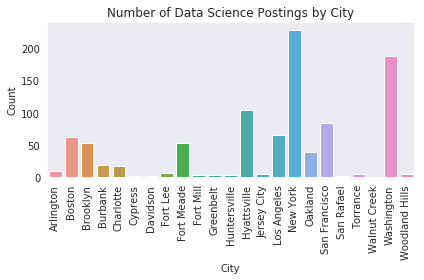

In [11]:
# Creating a box plot with n.o of data science job openings in different locations
# plot1 = df_sal_no_dup[['ID','City']].groupby(['City']).agg('count').plot(kind = 'bar', legend = False, title = "Number of Data Science Postings by City")
plot1 = df_sal_no_dup[['ID','City']].groupby(['City']).agg('count').reset_index().rename(columns = {'ID' : 'Count'})
sns.set_style("dark")
sns.barplot(x = plot1['City'], y = plot1['Count'])
plt.xticks(rotation = 90)
plt.title("Number of Data Science Postings by City")
plt.tight_layout()
plt.show()

Based on the graph obove, New York has the highest number of job postings for data scientists. Also, notice that we were able to extract many more cities from company address than the cities specified in the introduction section of the document. This is because our data included job postings which belonged to neigborhoods close to aforementioned major metropolitan cities.

 *What average salaries are being offered in these cities?*

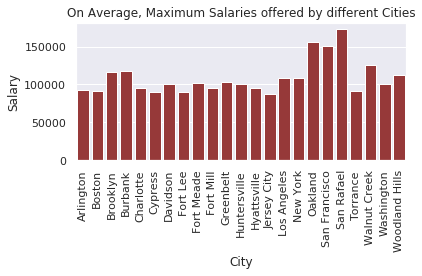

In [12]:
# Calculating and plotting average salaries offered in different locations (average of the max)
df_sal_no_dup['Annual_Max_Salary'] = df_sal_no_dup['Annual_Max_Salary'].astype(int)
# plot2 = df_sal_no_dup[['City','Annual_Max_Salary']].groupby('City').agg('mean').plot(kind = 'bar', color = 'gray', title = 'On Average, Maximum Salaries offered by different Cities')
plot2 = df_sal_no_dup[['City','Annual_Max_Salary']].groupby('City').agg('mean').reset_index()
sns.set_style("whitegrid")
sns.set()
sns.barplot(x = plot2['City'], y = plot2['Annual_Max_Salary'], color='brown')
plt.xticks(rotation = 90)
plt.ylabel('Salary')
plt.title("On Average, Maximum Salaries offered by different Cities")
plt.tight_layout()
plt.show()

Out of the cities, San Rafael, which is close to San Francisco, seems to be offering the highest salary for data scientist positions.

*Which companies are most actively looking for data scientists?*

In [13]:
import chart_studio.plotly as py
## Companies with highest n.o of postings
plot3 = df_sal_no_dup[['ID','Company']].groupby(['Company']).agg('count').reset_index().rename(columns = {'ID': 'Count'})
plot3 = plot3.loc[plot3['Count'] >= 10, :]
data_bar = [go.Bar(x = plot3['Company'] , y = plot3['Count'], name = 'company_count_barplot', marker = dict(color = '#109618'), width = 0.5)]
layout = go.Layout(title = 'Companies with 10 or more Data Science job postings', xaxis_tickangle = -90)
fig = go.Figure(data = data_bar, layout = layout)
fig.layout.template = 'plotly_white'
pyo.iplot(fig)

Interestingly, Deloitte tops the chart by quite some distance. The company has 67 open spots in these prime locations. The next nearest competitors seem to be Verizon and Amazon, with 18 and 16 job postings respectively.


 *What are the salaries offered by these highly active companies?*

In [14]:
## Out of the 9 companies with highest n.o of job postings, which company is offering the highest salary on average
plot4 = df_sal_no_dup.loc[df_sal_no_dup['Company'].isin(plot3['Company'].unique()), :]
plot4 = plot4[['Company','Annual_Max_Salary']].groupby('Company').agg('mean').reset_index().rename(columns = {'Annual_Max_Salary' : 'Average Salary'})
data_bar2 = [go.Bar(x = plot4['Company'], y = plot4['Average Salary'], name = 'company_mean_sal_barplot', marker = dict(color = '#FF7F0E'), width = 0.5)]
layout = go.Layout(title = 'Average Salary offered by Companies with 10 or more Data Science job postings', xaxis_tickangle = -90)
fig = go.Figure(data = data_bar2, layout = layout)
fig.layout.template = 'plotly_white'
pyo.iplot(fig)

There is not much variance in the salaries offered by these companies with highest number of job postings. You would expect this as the most aggressive companies would want to push for a competitive salary, as they try to attract best talent.

The above graphs help us better understand the data that we are dealing with. However, they also provide some insights.
For example, some job postings are outside the main cities. Hence, they need to be mapped to the nearest city.
Hence, we would need to create an additional column that maps these job postings to the nearest metropolitan city.

In [15]:
# Checking n.o of unique cities
df_sal_no_dup['City'].unique()

# df_sal_no_dup.loc[df_sal_no_dup['City'] == 'Davidson', :]

# Grouping the cities
# if New York, Brooklyn, Jersey City, Fort Lee then NYC
# if Fort Mill, Huntersville, Davidson, Charlotte then Charlotte
# if San Rafael, Oakland, Walnut Creek, San Francisco then San Francisco
# Boston
# if Burbank, Torrance, Woodland Hills, Cypress then Los Angeles
# if Fort Meade, Hyattsville, Arlington, Greenbelt then Washington

city_mapping = {'New York': 'New York City', 'Brooklyn' : 'New York City', 'Jersey City' : 'New York City', 'Fort Lee' : 'New York City',
                'Fort Mill':'Charlotte','Huntersville':'Charlotte','Davidson':'Charlotte',
                'San Rafael':'San Francisco','Oakland':'San Francisco','Walnut Creek':'San Francisco',
                'Burbank':'Los Angeles','Torrance':'Los Angeles','Woodland Hills':'Los Angeles', 'Cypress':'Los Angeles',
                'Fort Meade':'Washington','Hyattsville':'Washington','Arlington':'Washington','Greenbelt':'Washington'
        }
# print(city_mapping)

In [16]:
# Re-mapping to major cities
df_sal_no_dup['Major_City'] = df_sal_no_dup['City']
df_sal_no_dup = df_sal_no_dup.replace({'Major_City': city_mapping})
# df_sal_no_dup.loc[df_sal_no_dup['Major_City'].isnull(),:]

## 5. Future Scope 

1. Perform in-depth inferential analysis on data science job market statistics and make recommendations based on job location, type, salary and company.
2. Create a predictive model that predicts whether a particular candidate will accept or reject the offer based on various features associated with a company's job posting.
3. Rank different companies based on features provided by the applicant in order to optimise job application process and identify most suitable companies